## Insets for 1B in Bloniasz, Oyama, Stephen (2024)

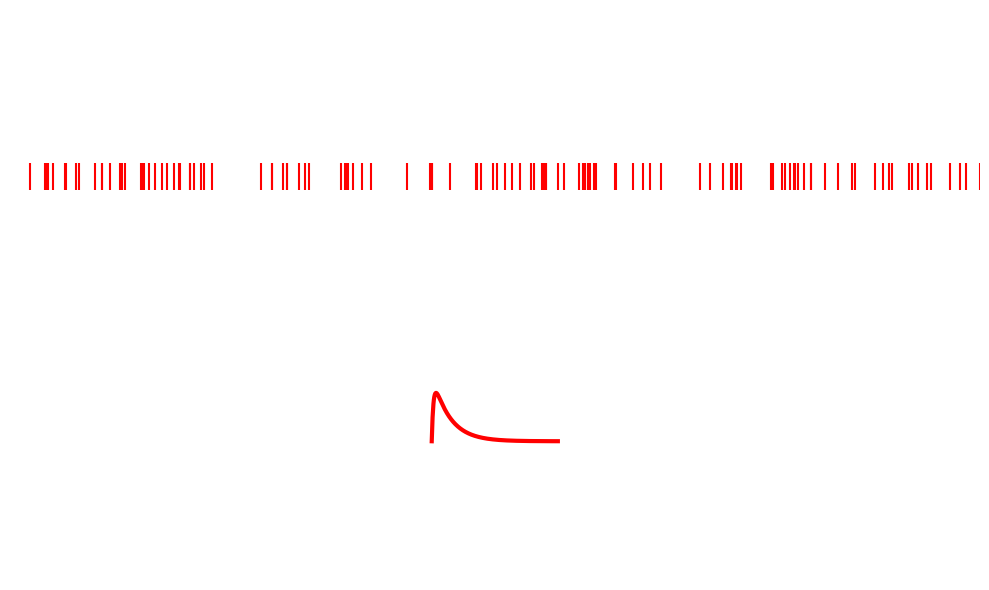

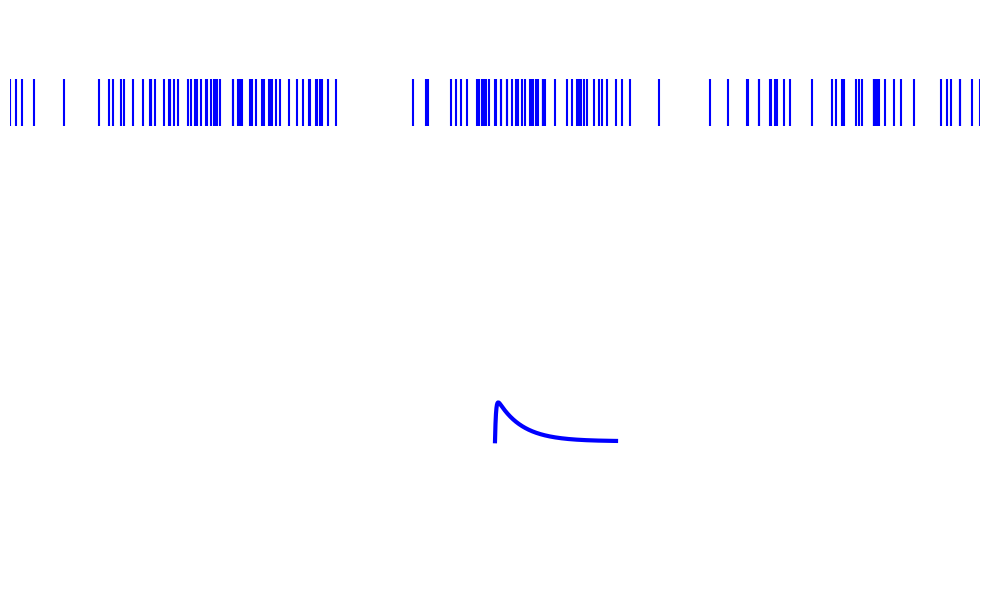

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Import from the new package
from filtered_point_process.model import Model
from filtered_point_process.point_processes.filtered_point_process import FilteredPointProcess

# ------------------------------
# 1. AMPA Simulation and Plotting
# ------------------------------
# Define model parameters 
model_name = "gaussian"
model_params = {
    "peak_height": [1000],      # Use the old value of 100000
    "center_frequency": [1.5],      # Hz
    "peak_width": [0.1],          # Hz
    "lambda_0": [70],
}
simulation_params_ampa = {
    "fs": 10000,   
    "T": 2,         # Total time (s)
    "simulate": True,
    "seed": 45,     # Seed for reproducibility
}

# Create and simulate the model for AMPA
model_ampa = Model(
    model_name=model_name,
    model_params=model_params,
    simulation_params=simulation_params_ampa,
)
spike_times_ampa = model_ampa.spikes

# Define filters for AMPA (using a single filter)
fpp_ampa = FilteredPointProcess(filters={"AMPA": "AMPA"}, model=model_ampa)
# The apply_filter_sequences method expects a list (one entry per process)
fpp_ampa.apply_filter_sequences([["AMPA"]])

# Access the AMPA filter instance and extract time-domain kernel info
ampa_instance = fpp_ampa.filter_instances.get("AMPA")
if ampa_instance is not None:
    # Slice the kernel and its time axis 
    kernel_time_axis_ampa = ampa_instance.kernel_time_axis[:300]
    kernel_ampa = ampa_instance.kernel[:300]
else:
    kernel_time_axis_ampa = np.array([])
    kernel_ampa = np.array([])

# Plot the spike raster and the AMPA kernel
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={"height_ratios": [1, 1]})
ax1.eventplot(spike_times_ampa, colors="red", linelengths=0.5)
ax1.set_xlim([0, spike_times_ampa.max() if spike_times_ampa.size > 0 else 2])
ax1.set_ylim([-1, 4])
ax1.set_xticks([])
ax1.set_yticks([])
for spine in ax1.spines.values():
    spine.set_visible(False)

ax2.plot(kernel_time_axis_ampa, 0.5 * kernel_ampa, color="red", lw=3)
ax2.set_xlim([-0.1, 0.13])
ax2.set_ylim([-1, 1])
ax2.set_xticks([])
ax2.set_yticks([])
for spine in ax2.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

# ------------------------------
# 2. GABA Simulation and Plotting
# ------------------------------
# Update simulation parameters for a different seed (GABA simulation)
simulation_params_gaba = simulation_params_ampa.copy()
simulation_params_gaba["seed"] = 46 

# Create and simulate the model for GABA
model_gaba = Model(
    model_name=model_name,
    model_params=model_params,
    simulation_params=simulation_params_gaba,
)
spike_times_gaba = model_gaba.spikes

# Define filters for GABA (using a single filter)
fpp_gaba = FilteredPointProcess(filters={"GABA": "GABA"}, model=model_gaba)
fpp_gaba.apply_filter_sequences([["GABA"]])

# Access the GABA filter instance and extract time-domain kernel info
gaba_instance = fpp_gaba.filter_instances.get("GABA")
if gaba_instance is not None:
    kernel_time_axis_gaba = gaba_instance.kernel_time_axis[:500]
    kernel_gaba = gaba_instance.kernel[:500]
else:
    kernel_time_axis_gaba = np.array([])
    kernel_gaba = np.array([])

# Plot the spike raster and the GABA kernel
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={"height_ratios": [1, 1]})
ax1.eventplot(spike_times_gaba, colors="blue")
ax1.set_xlim([0, spike_times_gaba.max() if spike_times_gaba.size > 0 else 2])
ax1.set_ylim([-3, 3])
ax1.set_xticks([])  # Hide x-axis ticks
ax1.set_yticks([])  # Hide y-axis ticks
for spine in ax1.spines.values():
    spine.set_visible(False)

ax2.plot(kernel_time_axis_gaba, kernel_gaba, color="blue", lw=3)
ax2.set_xlim([-0.2, 0.2])
ax2.set_ylim([-3, 3])
ax2.set_xticks([])  # Hide x-axis ticks
ax2.set_yticks([])  # Hide y-axis ticks
for spine in ax2.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()
